In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as ts
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, MaxPool1D, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
import numpy as np

In [9]:
df_train = pd.read_csv('KDDTrain+.txt')
df_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [10]:
df_test = pd.read_csv('KDDTest+.txt')
df_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [11]:
Columns = (['time','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',
            'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
            'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
            'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
            'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
            'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
            'dst_host_srv_rerror_rate','attack','level'])

In [12]:
df_train.columns = Columns
df_train.head(15)

,time,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21
5,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
7,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
8,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.06,0.00,0.00,1.00,1.00,0.0,0.00,neptune,21
9,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [13]:
df_test.columns = Columns
df_test.head(15)

,time,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21
5,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21
6,0,tcp,telnet,SF,129,174,0,0,0,0,...,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15
7,0,tcp,http,SF,327,467,0,0,0,0,...,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21
8,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7
9,0,tcp,telnet,SF,0,0,0,0,0,0,...,0.50,0.01,0.00,0.00,0.00,0.00,0.66,0.32,mscan,9


C:\Users\esmabetul\AppData\Local\Temp\ipykernel_53668\1839338293.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack', data=df_train, palette='viridis')


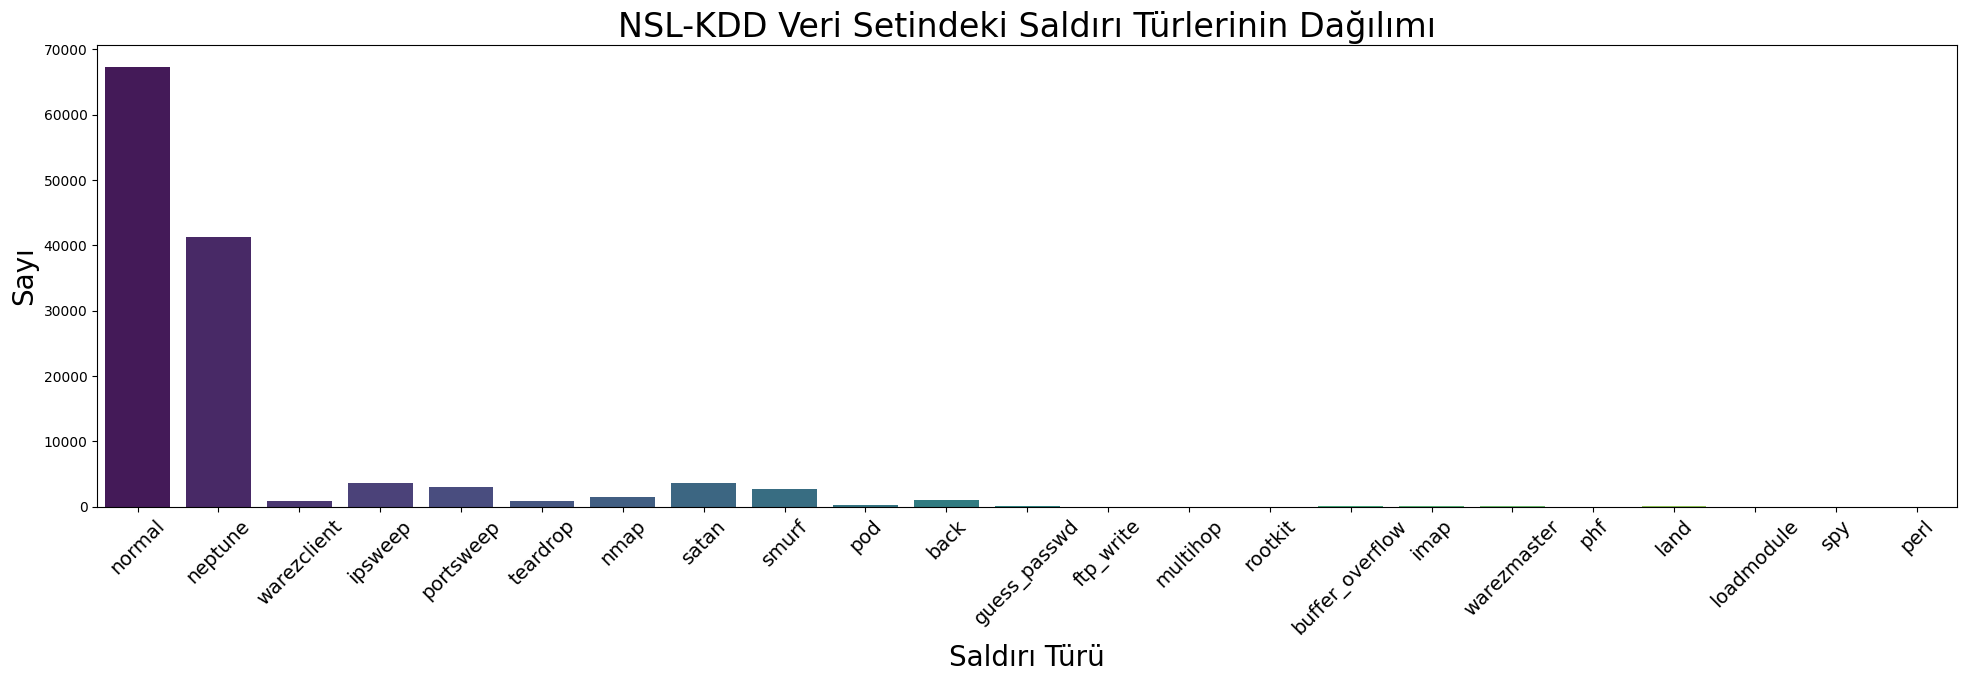

In [14]:
# 'attack' sütunu kategorik ise, bunu kodlamak isteyebilirsiniz; ama şu anda, kullanılabilir durumda olduğu varsayılmaktadır.  

# Daha büyük ve net bir grafik oluşturun  
plt.figure(figsize=(24, 6))  

# NSL-KDD veri setindeki 'attack' değişkeninin dağılımı  
sns.countplot(x='attack', data=df_train, palette='viridis')  

# Başlık ve etiketleri ayarlayın  
plt.title('NSL-KDD Veri Setindeki Saldırı Türlerinin Dağılımı', fontsize=24)  
plt.xlabel('Saldırı Türü', fontsize=20)  
plt.ylabel('Sayı', fontsize=20)  

# X eksenindeki etiketlerin yazı boyutunu artırın  
plt.xticks(rotation=45, fontsize=14)  # Birçok sınıf varsa etiketlerin üst üste gelmesini önlemek için döndürüyor  

# Grafiği bir resim olarak kaydedin  
plt.savefig('NSL-KDD_saldırı_türlerinin_dağılımı.jpg')  

# Grafiği gösterin  
plt.show()

C:\Users\esmabetul\AppData\Local\Temp\ipykernel_53668\544782663.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack', data=df_test, palette='viridis')


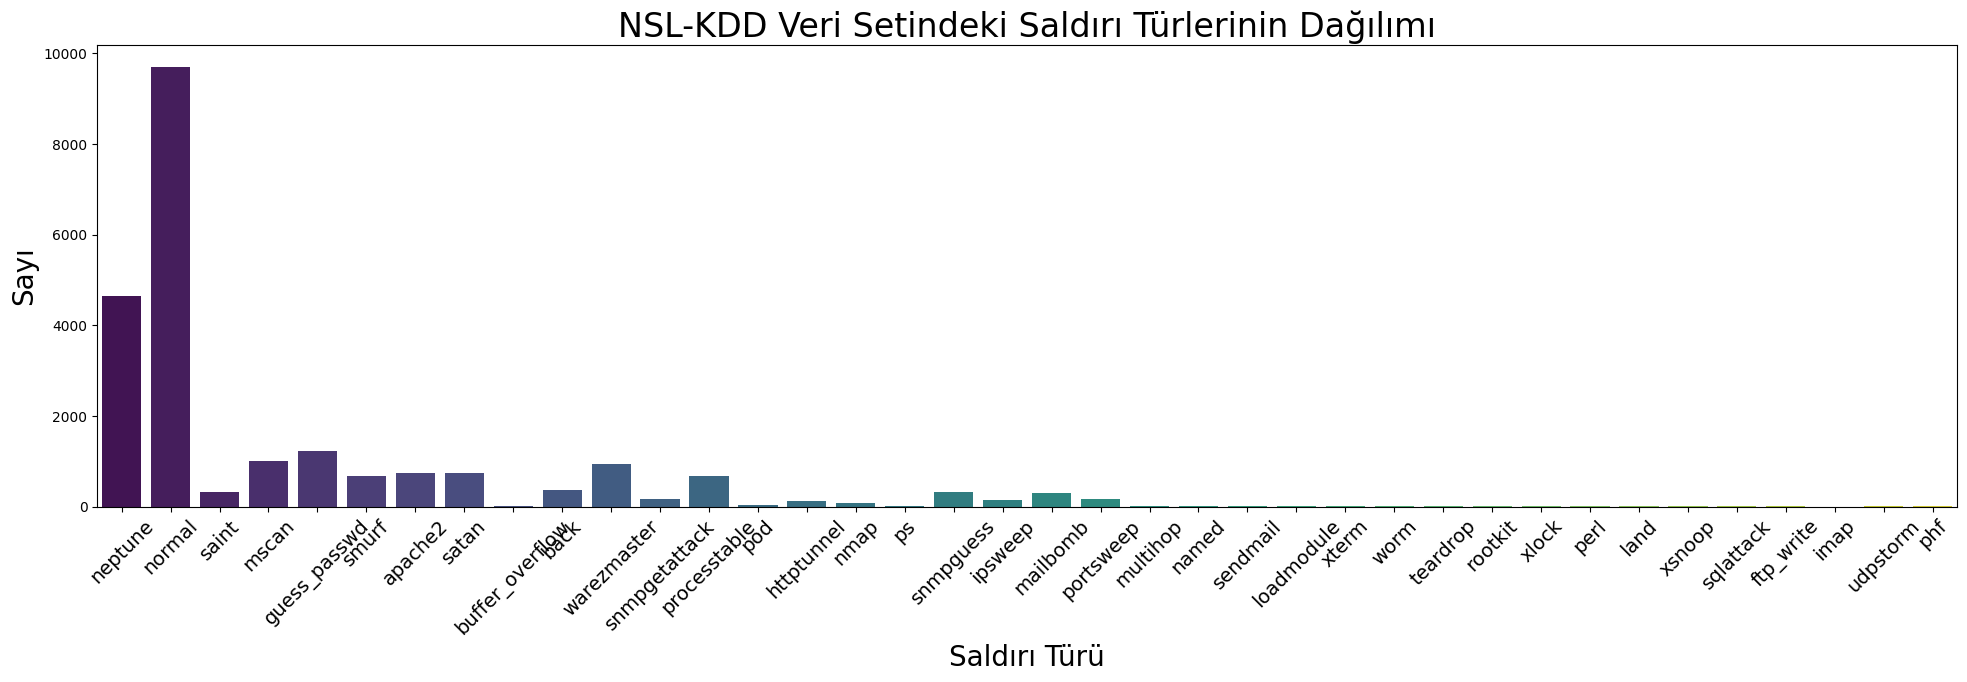

In [15]:
# 'attack' sütunu kategorik ise, bunu kodlamak isteyebilirsiniz; ama şu anda, kullanılabilir durumda olduğu varsayılmaktadır.  

# Daha büyük ve net bir grafik oluşturun  
plt.figure(figsize=(24, 6))  

# NSL-KDD veri setindeki 'attack' değişkeninin dağılımı  
sns.countplot(x='attack', data=df_test, palette='viridis')  

# Başlık ve etiketleri ayarlayın  
plt.title('NSL-KDD Veri Setindeki Saldırı Türlerinin Dağılımı', fontsize=24)  
plt.xlabel('Saldırı Türü', fontsize=20)  
plt.ylabel('Sayı', fontsize=20)  

# X eksenindeki etiketlerin yazı boyutunu artırın  
plt.xticks(rotation=45, fontsize=14)  # Birçok sınıf varsa etiketlerin üst üste gelmesini önlemek için döndürüyor  

# Grafiği bir resim olarak kaydedin  
plt.savefig('NSL-KDD_saldırı_türlerinin_dağılımı.jpg')  

# Grafiği gösterin  
plt.show()

In [16]:
df_train.nunique()

time                           2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [17]:
def unique_values(df, columns):
    '''   
    Belirtilen sütunlar için, verilen DataFrame'deki benzersiz değerleri ve bunların sayısını yazdırır.  
    '''  
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
         # Benzersiz değerleri ve onların sayılarını çıkar
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
       # Benzersiz değerleri ve onların sayılarını yazdır 
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

# NSL-KDD veri setindeki kategorik özellikleri (object tipi) seçin 
cat_features = df_train.select_dtypes(include='object').columns

# Kategorik özellikler için benzersiz değerleri ve sayıları yazdırmak için fonksiyonu çağırın
unique_values(df_train, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

In [18]:
df_train_attack = df_train.attack.map(lambda a: 0 if a == 'normal' else 1)
df_test_attack = df_test.attack.map(lambda a: 0 if a == 'normal' else 1)

df_train['attack_state'] = df_train_attack
df_test['attack_state'] = df_test_attack

In [19]:
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']


attack_labels = ['Normal','DoS','Probe','Privilege','Access']


def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks 4
        attack_type = 4
    else:
        # normal 0
        attack_type = 0
        
    return attack_type

attack_map = df_train.attack.apply(map_attack)
df_train['attack_map'] = attack_map

test_attack_map = df_test.attack.apply(map_attack)
df_test['attack_map'] = test_attack_map

le=LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df_train[x]=le.fit_transform(df_train[x])
    df_test[x]=le.fit_transform(df_test[x])

df_train.head()    

,time,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_map
0,0,2,44,9,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,11,15,0,0
1,0,1,49,5,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,9,19,1,1
2,0,1,24,9,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,11,21,0,0
3,0,1,24,9,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,11,21,0,0
4,0,1,49,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,9,21,1,1


In [20]:
df_test.head()

,time,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_state,attack_map
0,0,1,45,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,14,21,1,1
1,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.0,0.00,0.00,16,21,0,0
2,0,0,13,9,20,0,0,0,0,0,...,1.00,0.28,0.00,0.0,0.00,0.00,24,15,1,2
3,1,1,55,2,0,15,0,0,0,0,...,0.03,0.02,0.00,0.0,0.83,0.71,11,11,1,2
4,0,1,22,9,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.0,0.00,0.00,16,21,0,0


In [21]:
#Tekrarlanan satır kontrolü
df_train.duplicated().sum()

np.int64(0)

In [22]:
#Tekrarlanan satır kontrolü
df_test.duplicated().sum()

np.int64(0)

In [23]:
#Eksik veri kontrolü
df_train.isnull().sum()

time                           0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [24]:
#Eksik veri kontrolü
df_test.isnull().sum()

time                           0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [25]:
df_train.shape

(125972, 45)

In [26]:
df_test.shape

(22543, 45)

In [27]:
x_train=df_train.drop('attack_state',axis=1)
x_train=x_train.drop('attack',axis=1)
x_train=x_train.drop('attack_map',axis=1)
x_train=x_train.drop('level',axis=1)
y_train=df_train[['attack_state']]

X_train, X_test, Y_train, Y_test = train_test_split(x_train,y_train, test_size=0.20, random_state=42)

In [46]:
model = Sequential() 
model.add(Conv1D(32, 9, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(2)))
model.add(LSTM(units=16,return_sequences=False,dropout=0.2))
model.add(Dense(units=1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250)

Epoch 1/10


c:\Users\esmabetul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8483 - loss: 0.4175
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9108 - loss: 0.2224
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9356 - loss: 0.1795
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9442 - loss: 0.1547
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9484 - loss: 0.1510
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9328 - loss: 0.2012
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9497 - loss: 0.1436
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9585 - loss: 0.1248
Epoch 9/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9582 - loss: 0.1169
Epoch 10/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9549 - loss: 0.1251


In [48]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
Y_test = np.array(Y_test)

test_results = model.evaluate(X_test, Y_test, verbose=1)

788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9660 - loss: 0.0983
